<a href="https://colab.research.google.com/github/nadyaester/text-extraction/blob/master/TextExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

In [ ]:
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream = True)

with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata", "wb") as file:
  for block in r.iter_content(chunk_size = 1024):
    if block:
      file.write(block)

In [ ]:
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

from IPython.display import HTML, clear_output
clear_output()

In [ ]:
! pip install pytesseract wand opencv-python
clear_output()

In [ ]:
import cv2
import pytesseract
import re
from pytesseract import Output
from PIL import Image

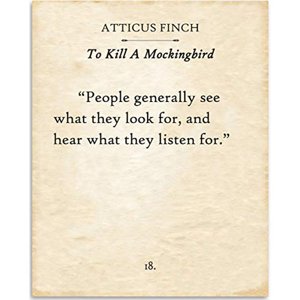

In [ ]:
image = Image.open(requests.get('https://i5.walmartimages.com/asr/01cc1571-08fb-4bca-8cb2-baec467a8007_1.6d6b7ce3c3b582794fb355406b8f04a0.jpeg?odnWidth=612&odnHeight=612&odnBg=ffffff', stream=True).raw)
image = image.resize((300,300))
image.save('sample.png')
image

In [ ]:
def deskew(image):
  coords = np.column_stack(np.where(image > 0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  (h,w) = image.shape[:2]
  center = (w // 2, h//2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w,h), flags = cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  return rotated

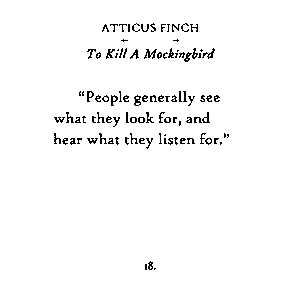

In [ ]:
image = cv2.imread('sample.png')
image = cv2.imread('sample.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
tresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

rotated = deskew(tresh)
Image.fromarray(rotated)

In [ ]:
try:
  text = pytesseract.image_to_string(rotated, lang="eng")
  characters_to_remove = "!()@-*>+/,'|#$%&^_~“”"
  new_string = text

  for character in characters_to_remove:
    new_string = new_string.replace(character, "")
  print(new_string)
except IOError as e:
  print("error (%s)." %e)

ATTICUS FINCH
To Kill A Mockingbird

People generally see
what they look for and
hear what they listen for.

